In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os 
import cv2

In [2]:
DATADIR = "E:\\sasa\\English\\Hnd\\Img\\"
CLASSES = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9',
               'A', 'B', 'C', 'D', 'E', 'F', 'G',
               'H', 'I', 'J', 'K', 'L', 'M', 'N',
               'O', 'P', 'Q', 'R', 'S', 'T', 'U',
               'V', 'W', 'X', 'Y', 'Z', 'as', 'bs', 
               'cs', 'ds', 'es', 'fs', 'gs', 'hs', 'is', 
               'js', 'ks', 'ls', 'ms', 'ns', 'os', 'ps',
               'qs', 'rs', 'ss', 'ts', 'us', 'vs', 'ws', 
               'xs', 'ys', 'zs']
training_data = []
def create_training_data():
    for Class in CLASSES:
        path=os.path.join(DATADIR,Class) 
        class_num = CLASSES.index(Class)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(28,28))
                training_data.append([new_array,class_num])
            except Exception as e :
                pass 
create_training_data()


In [3]:
print(len(training_data))

3410


In [4]:
DATADIR = "E:\\sasa\\English\\Hnd\\Img\\"
CLASSES = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9',
               'A', 'B', 'C', 'D', 'E', 'F', 'G',
               'H', 'I', 'J', 'K', 'L', 'M', 'N',
               'O', 'P', 'Q', 'R', 'S', 'T', 'U',
               'V', 'W', 'X', 'Y', 'Z', 'as', 'bs', 
               'cs', 'ds', 'es', 'fs', 'gs', 'hs', 'is', 
               'js', 'ks', 'ls', 'ms', 'ns', 'os', 'ps',
               'qs', 'rs', 'ss', 'ts', 'us', 'vs', 'ws', 
               'xs', 'ys', 'zs']
testing_data = []
def create_testing_data():
    for Class in CLASSES:
        path=os.path.join(DATADIR,Class) 
        class_num = CLASSES.index(Class)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(28,28))
                testing_data.append([new_array,class_num])
            except Exception as e :
                pass 
create_testing_data()

In [5]:
Xtr=[]
ytr=[]
Xts=[]
yts=[]
for features , label in training_data :
    Xtr.append(features)
    ytr.append(label)
for features , label in testing_data :
    Xts.append(features)
    yts.append(label)

In [ ]:
Xtr[0]

In [321]:
from sklearn.model_selection import train_test_split
X_train, X_test_not_used , y_train, y_test_not_used = train_test_split(Xtr, ytr, test_size=0.00000001,random_state=44, shuffle =True)
X_train_not_used, X_test , y_train_not_used, y_test = train_test_split(Xts, yts, test_size=26,random_state=44, shuffle =True)

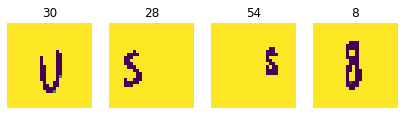

In [322]:
fig, axes = plt.subplots(1, 4, figsize=(7, 3))
for img, label, ax in zip(X_train[:4], y_train[:4], axes):
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [323]:
X_train = np.asarray(X_train)
print(f'train images: {X_train.shape}')
y_train = np.asarray(y_train)
print(f'train images: {y_train.shape}')
X_test= np.asarray(X_test)
print(f'test images: {X_test.shape}')
y_test= np.asarray(y_test)
print(f'test images: {y_test.shape}')

train images: (3409, 28, 28)
train images: (3409,)
test images: (26, 28, 28)
test images: (26,)


In [326]:
X_train = X_train.reshape(3409,28*28)/255.0
X_test = X_test.reshape(26,28*28)/255.0

In [327]:
y_train[0]

30

In [328]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [329]:
with tf.Session() as sess:
    y_train = sess.run(tf.one_hot(y_train , 62))# 62 is the number of classes 
    y_test = sess.run(tf.one_hot(y_test, 62))

In [340]:
learning_rate = 0.9
epochs = 20
batch_size = 20
batches= int(X_train.shape[0]/batch_size)
print(batches)

170


In [336]:
x_ = tf.placeholder(tf.float32 , shape=[None,784])
y_ = tf.placeholder(tf.float32 , shape=[None,62])
w = tf.Variable(tf.zeros([784,62],tf.float32))
b = tf.Variable(tf.zeros([62],tf.float32))

In [341]:
pred = tf.nn.softmax(tf.matmul(x_,w) +b)
print(pred)
cost = tf.reduce_mean(-tf.reduce_sum(y_*tf.log(pred),reduction_indices=[1]))


Tensor("Softmax_32:0", shape=(?, 62), dtype=float32)


In [1]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

NameError: name 'tf' is not defined

In [1]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    
    for epoch in range(epochs):
        for i in range(batches):
            offset = i * epoch
            x = X_train[offset: offset + batch_size]
            y = y_train[offset: offset + batch_size]
            sesh.run(optimizer, feed_dict={x_: x, y_:y})
            c = sesh.run(cost, feed_dict={x_:x, y_:y})
        print(f'epoch:{epoch:2d} cost={c:.4f}')
                
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    acc = accuracy.eval({x_: X_test, y_: y_test})
    print(f'Accuracy: {acc * 100:.2f}%')
    
    fig, axes = plt.subplots(1, 10, figsize=(8, 3))
    for img, ax in zip(X_test[:10], axes):
        guess = np.argmax(sesh.run(pred, feed_dict={x_: [img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape((28, 28)))
        ax.axis('off')

NameError: name 'tf' is not defined

In [159]:
n = [['ahmed',0],['adel',1]]
m = 